<a href="https://colab.research.google.com/github/CarolinaPiedrahita/fundamentos_IA/blob/main/piedrahita_carolina_actividad_semana4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre Completo:** Carolina Piedrahita

**Curso:** Machine Learning NRC-407

**Número de Semana:** Semana 4

**Nombre del Docente:** FELIX JULIAN GUTIERREZ BERNAL

**Fecha de Entrega:** 10 junio 2024

**Seleccioné el dataset para el clustering.**

Se importan varias bibliotecas necesarias para el análisis de datos: numpy para cálculos numéricos, pandas para manipulación de datos, matplotlib y seaborn para visualización de datos, y scikit-learn para aplicar algoritmos de clustering como KMeans, estandarización de datos, y evaluación de modelos mediante matrices de confusión y medidas de precisión. Además, se importa PCA de scikit-learn para la reducción de dimensionalidad [2].

In [165]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.decomposition import PCA


**Realicé la carga de datos desde Python (Google Colab)**

In [132]:

# Cargar el dataset Voting Records
url_voting = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
columns_voting = ['Class', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution',
                  'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban',
                  'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback',
                  'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

data_voting = pd.read_csv(url_voting, names=columns_voting, na_values='?')
print(data_voting.head())




        Class handicapped-infants water-project-cost-sharing  \
0  republican                   n                          y   
1  republican                   n                          y   
2    democrat                 NaN                          y   
3    democrat                   n                          y   
4    democrat                   y                          y   

  adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
0                                 n                    y               y   
1                                 n                    y               y   
2                                 y                  NaN               y   
3                                 y                    n             NaN   
4                                 y                    n               y   

  religious-groups-in-schools anti-satellite-test-ban  \
0                           y                       n   
1                           y               

El dataset de Voting Records (House Votes 84) es un conjunto de datos de votación de la Cámara de Representantes de EE.UU. en 1984. Este dataset se utiliza comúnmente para tareas de clasificación y análisis de datos en el contexto de aprendizaje supervisado y no supervisado.

### Descripción del Dataset

- **Fuente**: Este dataset está disponible en el UCI Machine Learning Repository.
- **URL**: [House Votes 84 Dataset](https://archive.ics.uci.edu/ml/datasets/House+Votes+84)
- **Número de instancias**: 435
- **Número de atributos**: 16 atributos de votación + 1 clase

### Atributos del Dataset

1. **Class (Clase)**:
   - Descripción: La afiliación política del miembro del Congreso.
   - Valores posibles: `republican` y `democrat`.

2. **handicapped-infants**:
   - Descripción: Votación sobre el proyecto de ley relacionado con los infantes discapacitados.
   - Valores posibles: `y` (yes), `n` (no), `?` (desconocido).

3. **water-project-cost-sharing**:
   - Descripción: Votación sobre el proyecto de ley relacionado con la compartición de costos de proyectos de agua.
   - Valores posibles: `y`, `n`, `?`.

4. **adoption-of-the-budget-resolution**:
   - Descripción: Votación sobre la adopción de la resolución presupuestaria.
   - Valores posibles: `y`, `n`, `?`.

5. **physician-fee-freeze**:
   - Descripción: Votación sobre el congelamiento de tarifas de los médicos.
   - Valores posibles: `y`, `n`, `?`.

6. **el-salvador-aid**:
   - Descripción: Votación sobre la ayuda a El Salvador.
   - Valores posibles: `y`, `n`, `?`.

7. **religious-groups-in-schools**:
   - Descripción: Votación sobre la presencia de grupos religiosos en las escuelas.
   - Valores posibles: `y`, `n`, `?`.

8. **anti-satellite-test-ban**:
   - Descripción: Votación sobre la prohibición de pruebas de satélites antisatélite.
   - Valores posibles: `y`, `n`, `?`.

9. **aid-to-nicaraguan-contras**:
   - Descripción: Votación sobre la ayuda a los contras nicaragüenses.
   - Valores posibles: `y`, `n`, `?`.

10. **mx-missile**:
    - Descripción: Votación sobre el misil MX.
    - Valores posibles: `y`, `n`, `?`.

11. **immigration**:
    - Descripción: Votación sobre la inmigración.
    - Valores posibles: `y`, `n`, `?`.

12. **synfuels-corporation-cutback**:
    - Descripción: Votación sobre la reducción de la corporación de combustibles sintéticos.
    - Valores posibles: `y`, `n`, `?`.

13. **education-spending**:
    - Descripción: Votación sobre el gasto en educación.
    - Valores posibles: `y`, `n`, `?`.

14. **superfund-right-to-sue**:
    - Descripción: Votación sobre el derecho a demandar relacionado con Superfund.
    - Valores posibles: `y`, `n`, `?`.

15. **crime**:
    - Descripción: Votación sobre proyectos de ley relacionados con el crimen.
    - Valores posibles: `y`, `n`, `?`.

16. **duty-free-exports**:
    - Descripción: Votación sobre exportaciones libres de impuestos.
    - Valores posibles: `y`, `n`, `?`.

17. **export-administration-act-south-africa**:
    - Descripción: Votación sobre la Ley de Administración de Exportaciones relacionada con Sudáfrica.
    - Valores posibles: `y`, `n`, `?`.



**Correlación entre los datos**

Convierto las variables categóricas en numéricas utilizando la codificación one-hot (eliminando la primera categoría para evitar la multicolinealidad). Luego, calculo la matriz de correlación de estas variables numéricas para identificar las relaciones entre ellas. Finalmente, visualizo la matriz de correlación utilizando un heatmap de Seaborn, mostrando las correlaciones entre las variables del conjunto de datos Voting Records. Esto me permite identificar visualmente las relaciones positivas y negativas entre las variables codificadas [2].

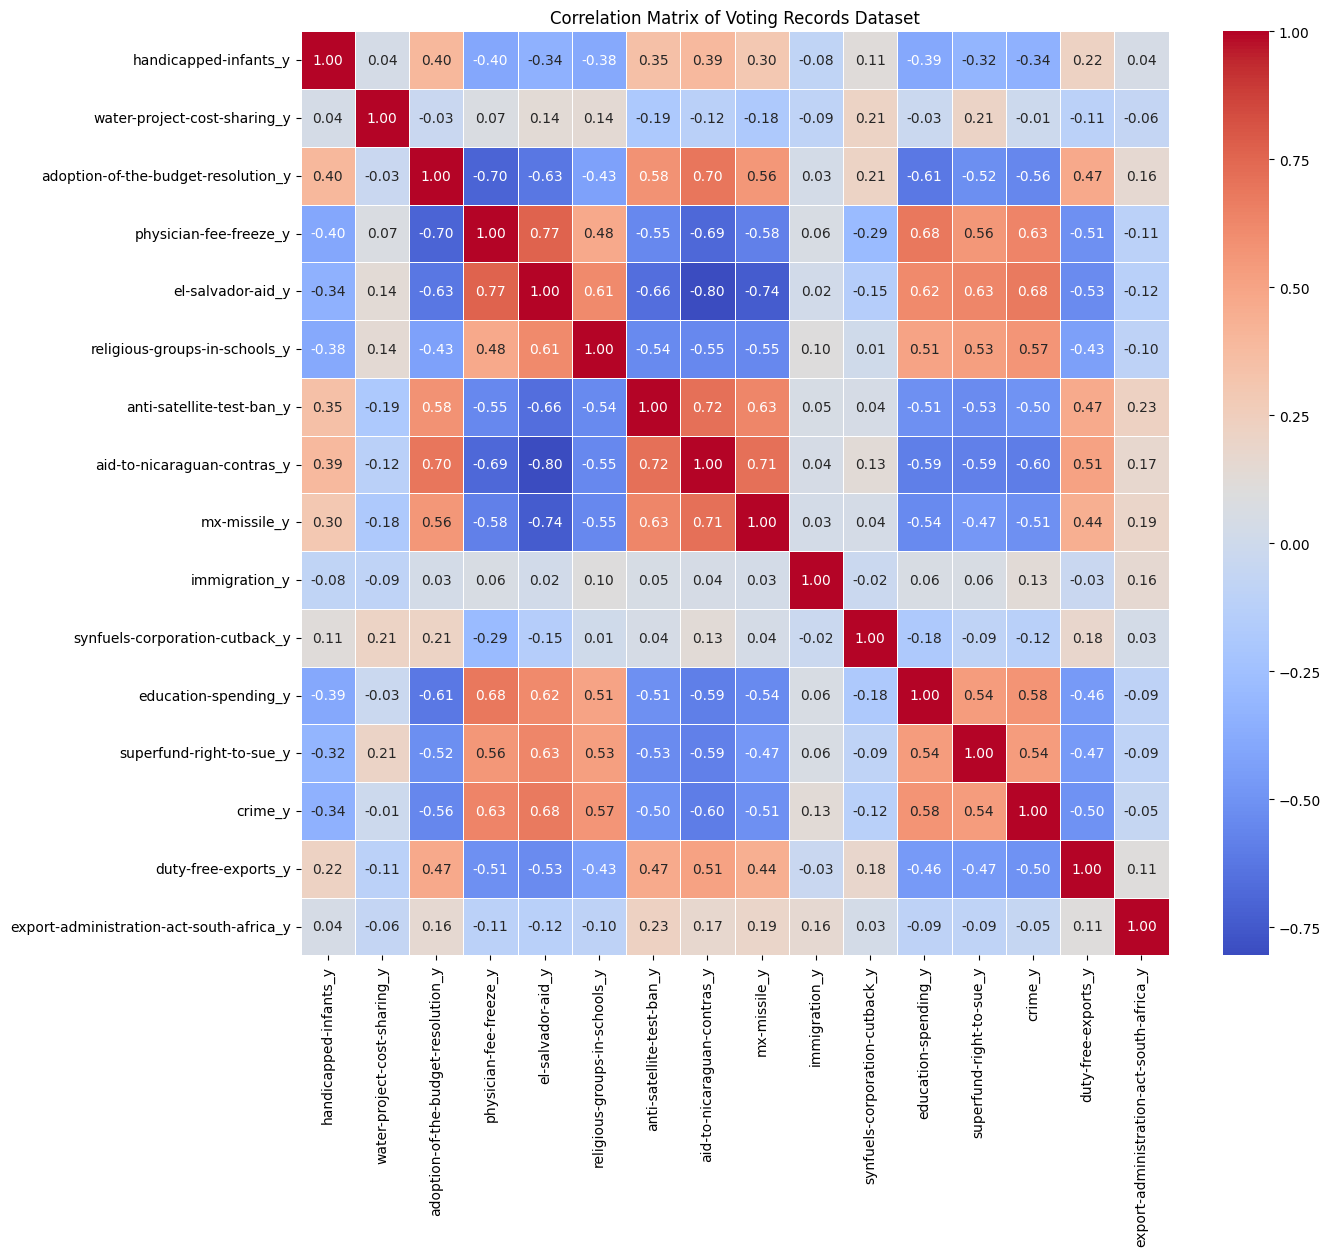

In [133]:
# Convertir las variables categóricas en numéricas
data_voting_encoded = pd.get_dummies(data_voting.drop('Class', axis=1), drop_first=True)

# Calcular la matriz de correlación
corr_matrix = data_voting_encoded.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Voting Records Dataset')
plt.show()


Al analizar la matriz de correlación del dataset de Voting Records, puedo observar varias relaciones interesantes entre las diferentes votaciones de los miembros del Congreso de EE.UU. en 1984.

**Fuertes Correlaciones Positivas: **

La votación sobre la "prohibición de pruebas de satélites antisatélite" (anti-satellite-test-ban_y) muestra una alta correlación positiva con varias otras votaciones, como la "ayuda a los contras nicaragüenses" (aid-to-nicaraguan-contras_y) con un valor de 0.72. Esto indica que los miembros que votaron a favor de una de estas medidas tendieron a votar a favor de la otra.
Similarmente, la votación sobre el "congelamiento de tarifas de los médicos" (physician-fee-freeze_y) está altamente correlacionada con la "adopción de la resolución presupuestaria" (adoption-of-the-budget-resolution_y) con un valor de 0.77. Esto sugiere un alineamiento ideológico consistente en temas económicos.

**Fuertes Correlaciones Negativas:**

La votación sobre el "congelamiento de tarifas de los médicos" (physician-fee-freeze_y) muestra una alta correlación negativa con la "ayuda a El Salvador" (el-salvador-aid_y) con un valor de -0.80. Esto implica que aquellos que votaron a favor del congelamiento de tarifas probablemente votaron en contra de la ayuda a El Salvador.
La "ayuda a los contras nicaragüenses" (aid-to-nicaraguan-contras_y) también está fuertemente correlacionada negativamente con el "gasto en educación" (education-spending_y) con un valor de -0.59. Este patrón destaca diferencias ideológicas entre los miembros del Congreso en temas de política exterior y gasto doméstico.

**Correlaciones Moderadas:**

La votación sobre "grupos religiosos en las escuelas" (religious-groups-in-schools_y) tiene correlaciones moderadas tanto positivas como negativas con otras votaciones. Por ejemplo, muestra una correlación de 0.61 con la "adopción de la resolución presupuestaria" (adoption-of-the-budget-resolution_y) y de -0.55 con la "ayuda a El Salvador" (el-salvador-aid_y). Estas relaciones subrayan las divisiones en temas de religión y política exterior.



Me doy cuenta de la complejidad y la interconexión de las decisiones políticas de los miembros del Congreso. Las correlaciones positivas fuertes indican coalición y cohesión ideológica en ciertos temas, mientras que las correlaciones negativas indican una división significativa.

**Preprocesamiento del dataset**

Primero, relleno los valores faltantes (NaN) en el DataFrame data_voting con el valor de la moda de cada columna, asegurando que no haya datos ausentes. Luego, convierto las variables categóricas en variables numéricas utilizando la codificación one-hot para todas las columnas excepto la columna 'Class'. Esto crea un nuevo DataFrame data_voting_encoded donde cada categoría se representa como una columna binaria (0 o 1), facilitando el análisis y modelado de los datos [2].








In [134]:
# Preprocesamiento del dataset Voting Records
data_voting.fillna(data_voting.mode().iloc[0], inplace=True)
data_voting_encoded = pd.get_dummies(data_voting.drop('Class', axis=1))

In [169]:
# Mostrar las primeras filas del DataFrame original con valores faltantes rellenados
print("Dataset original con valores faltantes rellenados:")
print(data_voting.head())

Dataset original con valores faltantes rellenados:
        Class handicapped-infants water-project-cost-sharing  \
0  republican                   n                          y   
1  republican                   n                          y   
2    democrat                   n                          y   
3    democrat                   n                          y   
4    democrat                   y                          y   

  adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
0                                 n                    y               y   
1                                 n                    y               y   
2                                 y                    n               y   
3                                 y                    n               y   
4                                 y                    n               y   

  religious-groups-in-schools anti-satellite-test-ban  \
0                           y                     

In [170]:
# Mostrar las primeras filas del nuevo DataFrame codificado
print("Nuevo dataset después de la codificación one-hot:")
print(data_voting_encoded.head())

Nuevo dataset después de la codificación one-hot:
   handicapped-infants_n  handicapped-infants_y  water-project-cost-sharing_n  \
0                   True                  False                         False   
1                   True                  False                         False   
2                   True                  False                         False   
3                   True                  False                         False   
4                  False                   True                         False   

   water-project-cost-sharing_y  adoption-of-the-budget-resolution_n  \
0                          True                                 True   
1                          True                                 True   
2                          True                                False   
3                          True                                False   
4                          True                                False   

   adoption-of-the-budget-reso

In [171]:
# Verificar si hay valores no numéricos
print(data_voting_encoded.dtypes)



handicapped-infants_n                        bool
handicapped-infants_y                        bool
water-project-cost-sharing_n                 bool
water-project-cost-sharing_y                 bool
adoption-of-the-budget-resolution_n          bool
adoption-of-the-budget-resolution_y          bool
physician-fee-freeze_n                       bool
physician-fee-freeze_y                       bool
el-salvador-aid_n                            bool
el-salvador-aid_y                            bool
religious-groups-in-schools_n                bool
religious-groups-in-schools_y                bool
anti-satellite-test-ban_n                    bool
anti-satellite-test-ban_y                    bool
aid-to-nicaraguan-contras_n                  bool
aid-to-nicaraguan-contras_y                  bool
mx-missile_n                                 bool
mx-missile_y                                 bool
immigration_n                                bool
immigration_y                                bool


In [172]:
# Verificar el número de características del dataset original
print(f"Número de características en el dataset original: {data_voting_encoded.shape[1]}")


Número de características en el dataset original: 33


In [173]:
# Estandarización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_voting_encoded)


In [47]:


# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_voting_scaled)

plt.figure(figsize=(12, 12))


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

**Uso de modelo K-Means**

Aplicando el algoritmo KMeans, configuro el modelo para que divida mis datos en tres clusters. Establezco una semilla aleatoria para asegurarme de que obtenga resultados consistentes cada vez que ejecuto el código. Luego, ajusto el modelo a mis datos estandarizados, permitiendo que KMeans encuentre los centros de los clusters y asigne cada punto de datos al cluster más cercano. Esto me ayuda a entender mejor cómo se agrupan mis datos [1].

In [174]:
# Aplicar KMeans
grupo = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(data_scaled)

Después de ajustar el modelo KMeans, obtengo las etiquetas de los clusters y los centros de los clusters. Uso grupo.labels_ para obtener las etiquetas, que me indican a cuál cluster pertenece cada punto de datos. También uso grupo.cluster_centers_ para obtener las coordenadas de los centros de cada cluster. Estas dos cosas me permiten ver cómo se distribuyen mis datos entre los clusters y dónde están ubicados los centros de cada grupo [1].

In [139]:
# Obtener las etiquetas y los centros de los clusters
labels = grupo.labels_
centers = grupo.cluster_centers_

In [140]:
# Imprimir las etiquetas y los centros de los clusters
print("Etiquetas de los clusters:", labels)
print("Centros de los clusters:", centers)

Etiquetas de los clusters: [1 1 1 2 2 2 1 1 1 0 1 1 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 2 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 2
 2 1 1 1 2 1 2 0 1 1 1 1 1 1 2 1 0 0 0 0 2 2 1 2 2 1 1 2 2 2 2 0 1 2 0 0 0
 1 2 1 0 2 0 1 0 1 1 1 1 1 0 1 1 0 2 2 0 2 1 1 1 1 1 2 2 0 2 1 1 0 2 2 1 2
 1 0 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 2 2 2 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 1 0 1 1 2 0 2 1 2 1 0 0 0 0 0 0 1 2 1 1 0 0 0 1 0 2 1 1 2 1 0 0 0 2
 0 1 1 1 2 0 1 1 1 1 0 1 2 1 0 2 0 1 1 0 2 0 0 0 2 1 2 0 1 1 0 1 0 0 1 1 0
 0 0 2 0 0 0 0 1 0 0 0 0 2 0 1 1 1 1 2 1 1 0 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1
 1 2 0 2 1 0 1 1 1 1 1 2 1 2 1 2 0 1 1 2 2 0 0 0 2 0 2 2 1 1 0 1 0 0 1 0 0
 0 2 1 2 0 0 1 1 2 2 1 0 1 1 1 0 2 2 2 2 1 2 0 1 1 2 1 2 2 2 1 1 1 0 2 2 1
 2 0 1 2 1 1 0 1 1 1 2 2 1 2 1 1 2 2 1 0 1 0 1 2 2 0 2 1 2 1 1 1 2 1 1 1 2
 1 2 1 1 2 1 2 0 2 1 0 0 0 2 2 0 2 2 0 0 1 0 0 1 0 1 1 1]
Centros de los clusters: [[-0.62944262  0.62944262  0.13860544 -0.13860544 -0.70732284  0.

Para evaluar el rendimiento de mi modelo KMeans, primero convierto las etiquetas verdaderas de la columna 'Class' en variables dummy usando pd.get_dummies(data_voting['Class']). Esto crea un DataFrame con las etiquetas verdaderas en formato numérico. Luego, obtengo las etiquetas predichas por el modelo KMeans usando grupo.labels_, que ya tengo de antes. Comparar estas etiquetas verdaderas con las predichas me ayuda a entender qué tan bien está funcionando mi modelo de clustering.

In [141]:
# Evaluar el modelo
true_labels = pd.get_dummies(data_voting['Class'])  # Asumiendo que las etiquetas verdaderas están en la columna 'Class'
predicted_labels = grupo.labels_

Para evaluar cómo está funcionando mi modelo KMeans, creo una matriz de confusión usando confusion_matrix(). Primero, convierto mis etiquetas verdaderas a su forma original usando true_labels.values.argmax(axis=1) para obtener la clase verdadera de cada dato. Luego, comparo estas etiquetas verdaderas con las etiquetas predichas (predicted_labels) que obtuve de mi modelo KMeans. La matriz de confusión me muestra cómo de bien están alineadas mis predicciones con las clases reales, dándome una visión clara de los aciertos y errores del modelo. Finalmente, imprimo la matriz de confusión para ver los resultados [1].

In [142]:

# Matriz de confusión
conf_matrix = confusion_matrix(true_labels.values.argmax(axis=1), predicted_labels)
print("Matriz de confusión:\n", conf_matrix)

Matriz de confusión:
 [[143  28  96]
 [  4 148  16]
 [  0   0   0]]


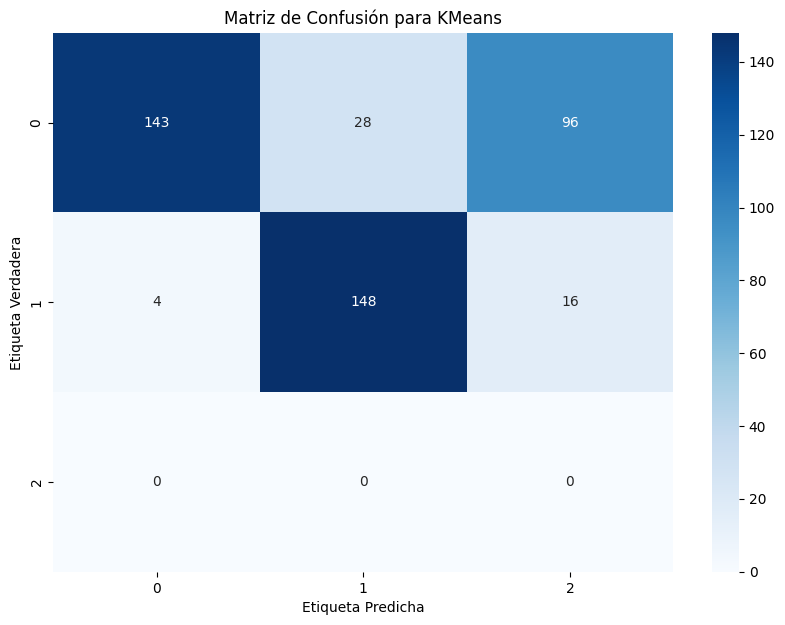

In [143]:
# Gráfico de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión para KMeans')
plt.show()

Observando la matriz de confusión para KMeans, noto que hay tres clases (0, 1 y 2) en las etiquetas verdaderas y las etiquetas predichas. Para la clase 0, mi modelo predijo correctamente 143 instancias, pero también confundió 28 instancias con la clase 1 y 96 instancias con la clase 2. Para la clase 1, el modelo hizo un buen trabajo prediciendo 148 instancias correctamente, aunque confundió 4 instancias con la clase 0 y 16 instancias con la clase 2. Finalmente, para la clase 2, el modelo no predijo correctamente ninguna instancia. Esta matriz de confusión me muestra que mi modelo KMeans tiene dificultades para diferenciar entre ciertas clases, especialmente la clase 2, lo que indica que hay espacio para mejorar en la precisión del clustering.

In [144]:
# Calcular la precisión
accuracy = accuracy_score(true_labels.values.argmax(axis=1), predicted_labels)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.6689655172413793


Al calcular la precisión de mi modelo KMeans, obtuve un valor de aproximadamente 0.67, lo que significa que el modelo clasifica correctamente alrededor del 67% de las instancias. Aunque esto indica que mi modelo está haciendo un trabajo razonablemente bueno en la agrupación de los datos, también muestra que hay un margen significativo para mejorar. En otras palabras, un tercio de las predicciones del modelo no coincide con las etiquetas verdaderas, lo que sugiere que el modelo tiene dificultades para diferenciar correctamente entre algunos clusters. Esta evaluación de la precisión me da una visión clara de la eficacia del modelo y me indica que necesito considerar ajustes o mejoras adicionales para aumentar su precisión.

**creo un nuevo DataFrame** para probar mi modelo, asegurándome de que tenga las mismas columnas que el DataFrame data_voting_encoded. Para hacerlo, primero creo un diccionario new_data_voting_dict donde cada clave es el nombre de una columna del DataFrame original y cada valor es una lista de valores correspondientes para los nuevos datos. Estas listas contienen datos binarios (0 o 1) que representan las respuestas a diferentes preguntas de votación. Lo que me permitirá realizar análisis  predicciones de manera consistente.

In [145]:
# Crear un DataFrame para los nuevos datos con las mismas columnas que data_voting_encoded
new_data_voting_dict = {
    'handicapped-infants_y': [1, 0, 1, 1],
    'water-project-cost-sharing_y': [0, 0, 1, 1],
    'adoption-of-the-budget-resolution_y': [1, 0, 1, 0],
    'physician-fee-freeze_y': [0, 0, 1, 0],
    'el-salvador-aid_y': [1, 0, 1, 1],
    'religious-groups-in-schools_y': [0, 0, 1, 1],
    'anti-satellite-test-ban_y': [1, 0, 1, 0],
    'aid-to-nicaraguan-contras_y': [0, 0, 1, 0],
    'mx-missile_y': [1, 0, 1, 1],
    'immigration_y': [0, 0, 1, 1],
    'synfuels-corporation-cutback_y': [1, 0, 1, 0],
    'education-spending_y': [0, 0, 1, 0],
    'superfund-right-to-sue_y': [1, 0, 1, 1],
    'crime_y': [0, 0, 1, 0],
    'duty-free-exports_y': [1, 0, 1, 0],
    'export-administration-act-south-africa_y': [0, 0, 1, 0]
}

In [146]:

# Completar las columnas faltantes con ceros para igualar la estructura
for col in data_voting_encoded.columns:
    if col not in new_data_voting_dict:
        new_data_voting_dict[col] = [0, 0, 0, 0]

In [147]:
# Crear el DataFrame con las nuevas columnas y verificar que las columnas coincidan
new_data_voting = pd.DataFrame(new_data_voting_dict, columns=data_voting_encoded.columns)


In [148]:
# Verificar la estructura de los datos nuevos
print(f"Número de características en los nuevos datos: {new_data_voting.shape[1]}")
print(new_data_voting.head())

Número de características en los nuevos datos: 32
   handicapped-infants_n  handicapped-infants_y  water-project-cost-sharing_n  \
0                      0                      1                             0   
1                      0                      0                             0   
2                      0                      1                             0   
3                      0                      1                             0   

   water-project-cost-sharing_y  adoption-of-the-budget-resolution_n  \
0                             0                                    0   
1                             0                                    0   
2                             1                                    0   
3                             1                                    0   

   adoption-of-the-budget-resolution_y  physician-fee-freeze_n  \
0                                    1                       0   
1                                    0             

In [150]:
# Asegurarse de que no haya NaN en los nuevos datos
new_data_voting.fillna(0, inplace=True)

Escalo los nuevos datos utilizando scaler.transform(new_data_voting) para estandarizarlos de la misma manera que hice con los datos originales, asegurándome de que tengan la misma escala. Luego, hago predicciones con el modelo KMeans que ya entrené usando grupo.predict(new_data_voting_scaled), lo que me permite determinar a qué cluster pertenece cada uno de estos nuevos datos según el modelo que ajusté previamente. Esto me ayuda a entender cómo se agrupan los nuevos datos en base a los patrones aprendidos por el modelo.

In [151]:
# Escalar los nuevos datos
new_data_voting_scaled = scaler.transform(new_data_voting)
predictions_voting = grupo.predict(new_data_voting_scaled)

In [152]:

# Imprimir las predicciones
print("Predicciones para nuevos datos de Voting Records:", predictions_voting)

Predicciones para nuevos datos de Voting Records: [2 2 2 2]


Al imprimir las predicciones para los nuevos datos de Voting Records, veo que todos los nuevos datos han sido asignados al cluster 2. Esto significa que, según el modelo KMeans que entrené, todos estos nuevos datos comparten características similares que los agrupan en el mismo cluster. Es posible que el cluster 2 tenga características dominantes que coincidan con los valores de las nuevas observaciones. Esto también puede indicar que los nuevos datos no son muy diversos entre sí o que el modelo podría estar sesgado hacia ciertos patrones en los datos. Para entender mejor por qué todos los datos nuevos caen en el mismo cluster, podría investigar las características de los clusters y revisar si hay algún patrón o desequilibrio en los datos originales o en el modelo.

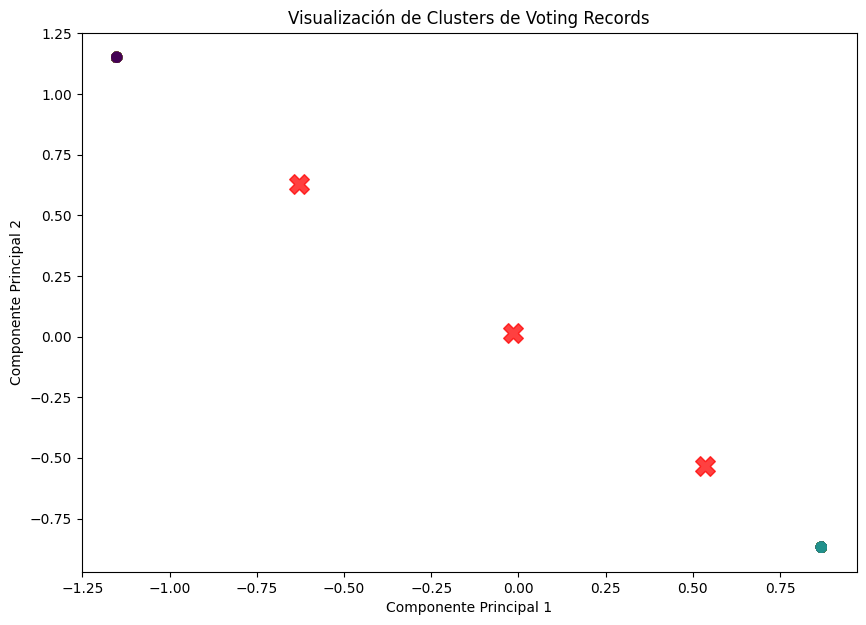

In [153]:
# Gráfico de los clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, s=50, cmap='viridis')
centers = grupo.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters de Voting Records')
plt.show()

En esta visualización grupal de registros de votación, veo que los puntos de datos están agrupados en diferentes áreas del gráfico, lo que representa los dos primeros componentes principales obtenidos por PCA. El centro del grupo está marcado con una "X" roja. Vale la pena señalar que un punto en la esquina superior izquierda está bastante aislado, mientras que los otros puntos están más juntos hacia el centro y el borde inferior derecho del gráfico. Esto demuestra que el punto aislado pertenece a un grupo completamente diferente en cuanto a sus características principales. Sin embargo, los puntos restantes están agrupados en un cluster, lo que puede indicar que tienen características similares.
La concentración de la mayoría de los puntos en la misma área puede indicar que el modelo KMeans está sesgado hacia este grupo en particular. Los centros de conglomerados dispersos indican que los datos están dispersos en ciertas direcciones, pero la mayoría de las nuevas observaciones están agrupadas en el mismo conglomerado, quizás en el conglomerado 2, como vimos en predicciones anteriores allí. Esto podría deberse a que los nuevos datos tienen características consistentes con las del grupo más grande, o también podría indicar que el modelo necesita ajustes para mejorar la separación de los grupos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


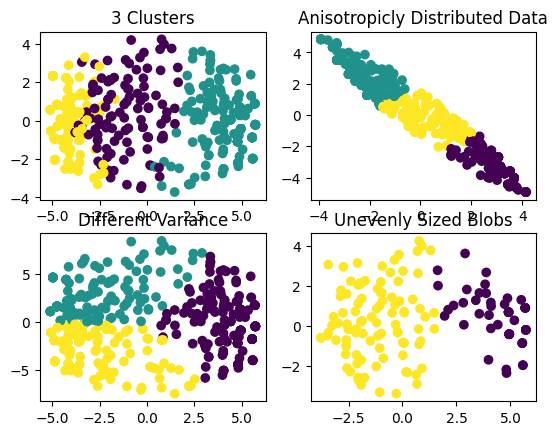

In [175]:
# KMeans con 3 clusters
kmeans_3_clusters = KMeans(n_clusters=3, random_state=0)
y_pred_3_clusters = kmeans_3_clusters.fit_predict(data_scaled)

plt.subplot(221)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_pred_3_clusters, cmap='viridis')
plt.title("3 Clusters")

# Datos anisotrópicos
transformation = np.array([[0.6, -0.6], [-0.4, 0.8]])
data_aniso = np.dot(data_pca, transformation)
kmeans_aniso = KMeans(n_clusters=3, random_state=42)
y_pred_aniso = kmeans_aniso.fit_predict(data_aniso)

plt.subplot(222)
plt.scatter(data_aniso[:, 0], data_aniso[:, 1], c=y_pred_aniso, cmap='viridis')
plt.title("Anisotropicly Distributed Data")

# Diferente varianza
data_varied = data_pca * [1, 2]
kmeans_varied = KMeans(n_clusters=3, random_state=42)
y_pred_varied = kmeans_varied.fit_predict(data_varied)

plt.subplot(223)
plt.scatter(data_varied[:, 0], data_varied[:, 1], c=y_pred_varied, cmap='viridis')
plt.title("Different Variance")

# Blobs de tamaños desiguales
data_filtered = np.vstack((data_pca[y_pred_3_clusters == 0][:100],
                           data_pca[y_pred_3_clusters == 1][:50]))
kmeans_filtered = KMeans(n_clusters=2, random_state=42)
y_pred_filtered = kmeans_filtered.fit_predict(data_filtered)

plt.subplot(224)
plt.scatter(data_filtered[:, 0], data_filtered[:, 1], c=y_pred_filtered, cmap='viridis')
plt.title("Unevenly Sized Blobs")

plt.show()

**Clusters:** En el primer gráfico, veo los datos distribuidos en tres clusters diferentes, representados por colores distintos. Los datos parecen estar razonablemente bien separados, aunque hay algo de solapamiento entre los clusters, lo que indica que algunos puntos no se asignan de manera clara a un solo cluster.

**Anisotropically Distributed Data:** En el segundo gráfico, los datos están distribuidos de manera anisotrópica. Aquí, los puntos de los tres clusters forman una línea diagonal clara, mostrando una estructura alargada. Esto sugiere que las relaciones entre las características están sesgadas en una dirección particular.

**Different Variance:** En el tercer gráfico, los datos tienen diferentes variancias dentro de los clusters. Los clusters se ven más dispersos y algunos puntos están más alejados del centro de su cluster, indicando que la varianza no es uniforme. Este tipo de distribución puede hacer que el clustering sea más desafiante, ya que los límites entre los clusters no son tan claros.

**Unevenly Sized Blobs:** En el cuarto gráfico, los blobs tienen tamaños desiguales. Aquí, algunos clusters contienen significativamente más puntos que otros. Esto puede ser un indicio de que los datos están desbalanceados, lo cual puede afectar la eficacia del algoritmo de clustering al tratar de identificar clusters en datasets con distribuciones desiguales.

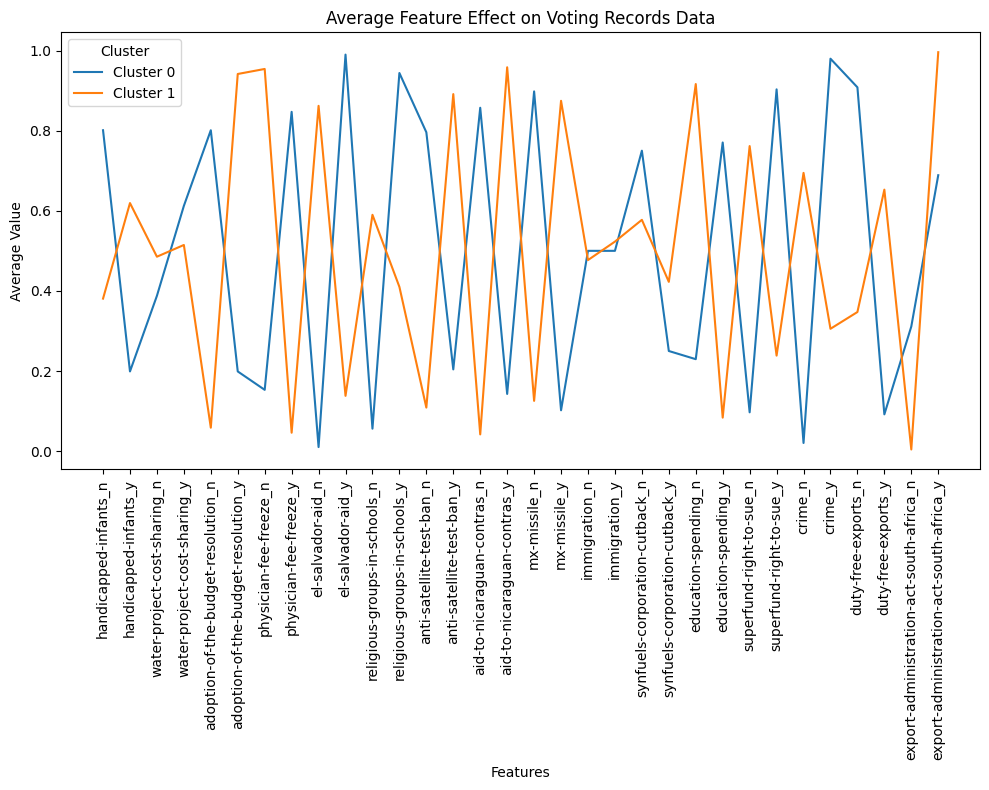

In [176]:

fig, ax = plt.subplots(figsize=(10, 8))

# Graficar cada característica media para cada cluster
for i in range(feature_means.shape[0]):
    sns.lineplot(x=feature_means.columns, y=feature_means.iloc[i], label=f'Cluster {i}', ax=ax)

# Configurar etiquetas y título
ax.set_title('Average Feature Effect on Voting Records Data')
ax.set_xlabel('Features')
ax.set_ylabel('Average Value')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

1. **Variación entre conglomerados**:
- Podemos observar diferencias notables entre ambos clusters en muchas características. Esto significa que los votos tienden a agruparse de manera diferente dentro de cada grupo, lo que refleja posibles diferencias en ideología o patrones de votación entre grupos.
- Por ejemplo, al votar por "infantes-discapacitados_n", el grupo 0 muestra una media más alta que el grupo 1. Esto podría significar que los miembros del grupo 0 tienden a votar "no" más que los miembros del grupo 1.
2. **Formulario de votación permanente**:
- Algunas características muestran patrones similares entre los dos grupos, aunque tengan valores diferentes. Por ejemplo, los votos a favor de "congelar los honorarios de los médicos" y "ayudar a los nicaragüenses-contra_n" tuvieron altibajos reflejados en ambos grupos, pero de diferente magnitud.
- Este comportamiento sugiere que, aunque existen diferencias en la frecuencia de los votos por sí y por no entre grupos, el patrón general de votación puede ser similar en términos de distribución de votos.
3. **Diferencias notables**:
- En el caso de características como "anti-satellite test-ban_n" y "ayuda para El Salvador" (el-salvador-aid_n), existen diferencias notables en el valor medio entre clusters. El grupo 1 tiene un valor medio mucho más alto del parámetro "anti-satellite-test-ban_n", lo que indica una mayor tendencia a votar "no" que el grupo 0.
- De manera similar, al votar sobre el tema "cost-education_y", el grupo 0 da un valor promedio más alto, lo que indica una tendencia a votar "sí" con más frecuencia que el grupo 1.
4. **Similitudes**:
- Algunas características, como el “costo compartido de los proyectos hídricos”, muestran menos variación entre los grupos, lo que sugiere que estas voces no están polarizadas y pueden encontrar un consenso más amplio entre los miembros del Congreso.


Al observar este gráfico, me doy cuenta de la complejidad de los patrones de votación en el Congreso de 1984. Las diferencias y similitudes en las características entre los grupos resaltan diferencias ideológicas y puntos de acuerdo entre los legisladores. Este tipo de análisis  me pareció muy potente porque no sólo es valioso para estudiar patrones históricos de votación, sino que también puede proporcionar información útil para predecir el comportamiento y la estrategia política futura.

   handicapped-infants_n  handicapped-infants_y  water-project-cost-sharing_n  \
0                   True                  False                         False   
1                   True                  False                         False   
2                   True                  False                         False   
3                   True                  False                         False   
4                  False                   True                         False   

   water-project-cost-sharing_y  adoption-of-the-budget-resolution_n  \
0                          True                                 True   
1                          True                                 True   
2                          True                                False   
3                          True                                False   
4                          True                                False   

   adoption-of-the-budget-resolution_y  physician-fee-freeze_n  \
0             

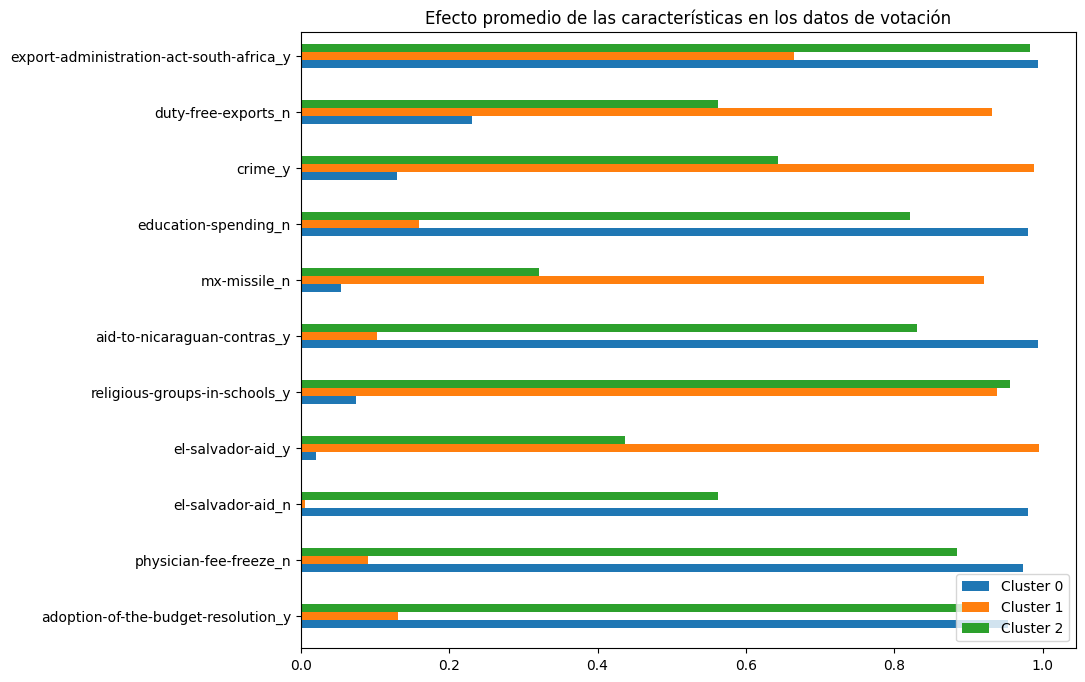

In [168]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
data_voting_encoded['Cluster'] = kmeans.fit_predict(data_scaled)

# Verificar que la columna 'Cluster' se ha añadido correctamente
print(data_voting_encoded.head())

def plot_feature_effects():
    # Calcular el promedio de las características por cluster
    feature_means = data_voting_encoded.groupby('Cluster').mean()
    feature_names = feature_means.columns
    target_names = ['Cluster 0', 'Cluster 1', 'Cluster 2']

    # Calcular los efectos promedio de las características
    average_feature_effects = feature_means.values

    # Identificar las 5 características más importantes para cada cluster
    top = pd.DataFrame()
    top_indices = np.array([])

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 1) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("Top 5 características por cluster:")
    print(top)

    return ax

_ = plot_feature_effects().set_title("Efecto promedio de las características en los datos de votación")
plt.show()

En el Cluster 0, noto que características como export-administration-act-south-africa_y, duty-free-exports_n, el-salvador-aid_y, y adoption-of-the-budget-resolution_y tienen valores promedio altos, lo que sugiere que los miembros de este cluster tienden a votar "sí" en estos temas.

En el Cluster 1, veo que aid-to-nicaraguan-contras_y y crime_y son particularmente prominentes, indicando que las personas en este cluster tienen una alta probabilidad de votar "sí" en estas áreas específicas.

El Cluster 2 muestra altos valores en características como education-spending_n y mx-missile_n, sugiriendo que los votos en este cluster tienden a ser negativos en estos temas.

Esta visualización me ayuda a comprender cómo se distribuyen las preferencias de voto dentro de cada grupo y qué características tienen el mayor impacto en la identificación del grupo. Esto me permite ver diferencias y similitudes entre grupos en función de características de votación específicas, lo que proporciona una imagen clara de los patrones de votación entre los grupos.

## Referencias

[1] K-Means con Python paso a paso | Aprende Machine Learning. (n.d.). Retrieved June 10, 2024, from https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/


[2] Fuentes, A. (2018). Become a python data analyst : Perform exploratory data analysis and gain insight into scientific computing using python. Packt Publishing, Limited.

